In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import scipy as sp
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from EM import EM

%matplotlib inline

In [2]:
# read the image
img = plt.imread('./corgi.png')[:, :, :3]

In [3]:
# plt.imshow(img)
# plt.show()

# # %matplotlib qt
# fig = plt.figure(figsize=(6, 5))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(np.reshape(img[:, :, 0], (-1)), np.reshape(img[:, :, 1], (-1)), np.reshape(img[:, :, 2], (-1)), 
#         'g.', markersize=0.1)
# ax.set_xlabel('R')
# ax.set_ylabel('G')
# ax.set_zlabel('B')
# plt.show()

In [4]:
# reshape the input vector
x = np.reshape(img, (-1, 3))

In [23]:
em = EM(m=3, threshold=1, maxIter=20)

In [24]:
em.train(x)

Reach the maximum iteration !


In [25]:
gamma, mu, sigma, E = em.get_params()

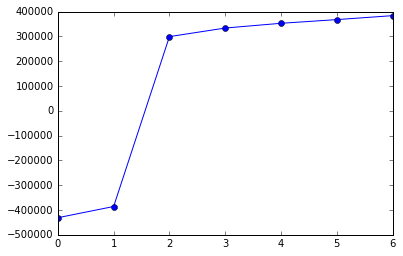

In [26]:
plt.plot(E, 'o-')

In [27]:
E

[-431122.2891063483,
 -385919.91664591176,
 299156.48036528757,
 333741.40100752481,
 352871.49544034543,
 367724.52968187444,
 383693.34297437145,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]